# Importando los paquetes a utilizar

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

# Limpiado las imagenes

In [2]:
#Importando las librerias para el manejo de imagenes
import cv2
import imghdr

C:\Users\Harol Reyes\AppData\Local\Temp\ipykernel_14328\3496441738.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
#Guardando la ruta de las carpetas donde estan almacenadas las imagenes.
data = 'Data'
image_type = ['jpeg', 'jpg', 'bmp','png']

In [4]:
#Eliminando las imagenes que no con tengaan las extensiones seleccionadas

for file in os.listdir(data):
    print(file)
    for image_file in os.listdir(os.path.join(data, file)):
        image_path = os.path.join(data, file, image_file).replace('\\', '\\\\')
        try:
            img = cv2.imread(image_path)
            type_img = imghdr.what(image_path)
            
            if type_img not in image_type:
                print('Image not in the supported extensions...')
                os.remove(image_path)
                
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Clean
damage


# Construyendo el dataset

In [5]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [6]:
data = tf.keras.utils.image_dataset_from_directory('Data')

Found 2300 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

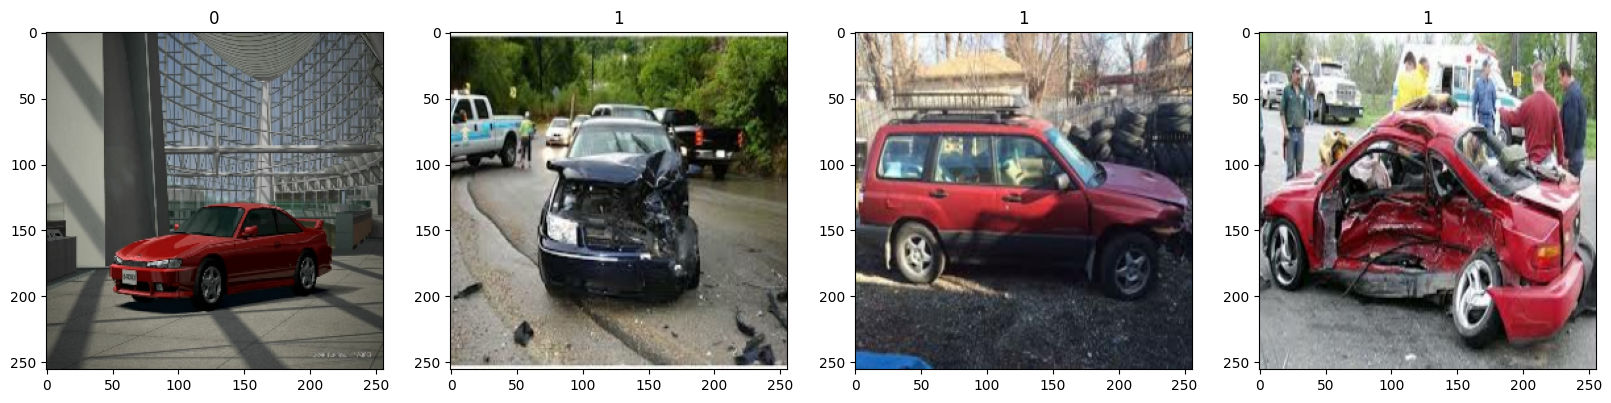

In [10]:
fig, ax = plt.subplots(ncols= 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Procesando la data

## Escalando la data

In [11]:
data = data.map(lambda x,y: (x, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[ 94.36088   , 101.36088   ,  85.36088   ],
          [ 80.578575  ,  89.2524    ,  72.90475   ],
          [ 74.916016  ,  82.916016  ,  69.66992   ],
          ...,
          [204.8829    , 205.8829    , 199.79688   ],
          [209.63206   , 210.63206   , 204.1609    ],
          [208.99524   , 209.99524   , 203.45308   ]],
 
         [[ 67.67248   ,  76.67248   ,  57.57482   ],
          [ 90.426094  ,  99.426094  ,  81.046585  ],
          [ 78.34071   ,  86.506584  ,  71.17485   ],
          ...,
          [161.41827   , 161.41827   , 153.07452   ],
          [166.77374   , 166.77374   , 157.32843   ],
          [170.63416   , 170.63416   , 160.98572   ]],
 
         [[ 88.48903   ,  98.237076  ,  74.992935  ],
          [ 68.12782   ,  77.12782   ,  56.631733  ],
          [ 61.88173   ,  70.88173   ,  52.385635  ],
          ...,
          [ 89.02691   ,  89.11896   ,  77.37677   ],
          [ 92.3747    ,  92.87875   ,  80.035     ],
          [ 85.07276   ,  85.65

## Separando la data

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Red neuronal

In [15]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(1, activation='sigmoid'))

In [19]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                        

# Entrenamiento

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50


50/50 [==============================] - 53s 1s/step - loss: 10.8978 - accuracy: 0.6388 - val_loss: 135.8523 - val_accuracy: 0.4911
Epoch 2/50
50/50 [==============================] - 52s 1s/step - loss: 4.1948 - accuracy: 0.6806 - val_loss: 0.9980 - val_accuracy: 0.7076
Epoch 3/50
50/50 [==============================] - 53s 1s/step - loss: 2.2561 - accuracy: 0.7206 - val_loss: 1.0402 - val_accuracy: 0.6808
Epoch 4/50
50/50 [==============================] - 53s 1s/step - loss: 1.3969 - accuracy: 0.7206 - val_loss: 0.5463 - val_accuracy: 0.7143
Epoch 5/50
50/50 [==============================] - 53s 1s/step - loss: 0.9368 - accuracy: 0.7287 - val_loss: 0.5294 - val_accuracy: 0.7098
Epoch 6/50
50/50 [==============================] - 52s 1s/step - loss: 0.8409 - accuracy: 0.7412 - val_loss: 0.4553 - val_accuracy: 0.7567
Epoch 7/50
50/50 [==============================] - 53s 1s/step - loss: 0.5811 - accuracy: 0.7944 - val_loss: 0.3931 - val_accuracy: 0.8326
Epoch 8/50
50/5

# Peformance

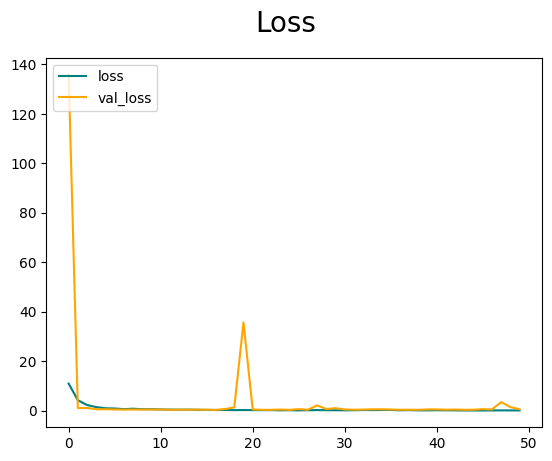

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

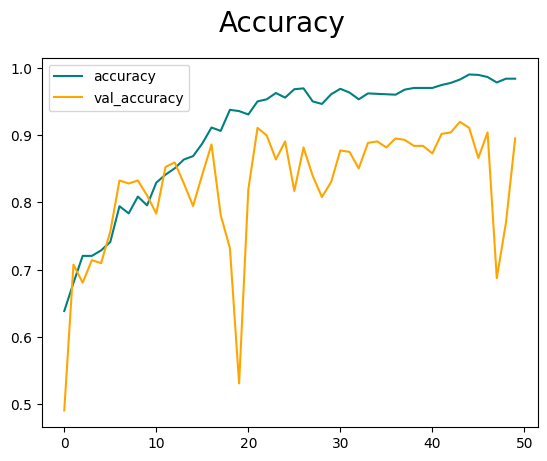

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluacion

In [26]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [28]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 191ms/step


In [29]:

print(f'Presition: {pre.result().numpy() * 100}, Recall: {re.result().numpy() *100}, Accuracy: {acc.result().numpy()*100}')

Presition: 89.8876428604126, Recall: 73.39449524879456, Accuracy: 83.03571343421936


# Testeo

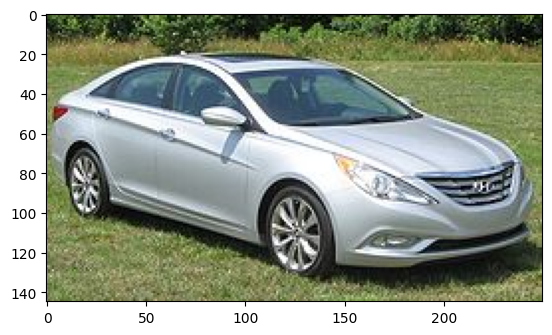

In [31]:
img = cv2.imread('sonata.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

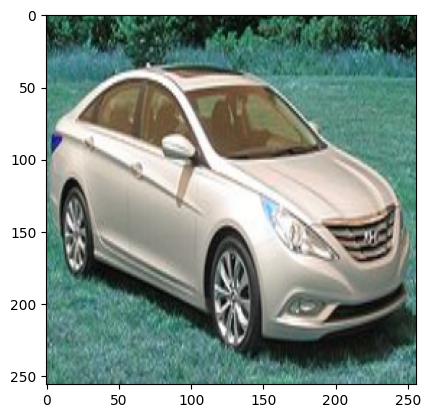

In [32]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [33]:
yhat = model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 117ms/step


In [34]:
if yhat > 0.5: 
    print(f'Siniestrado')
else:
    print(f'No siniestrado')

No siniestrado


# Guardando el modelo

In [35]:
from tensorflow.keras.models import load_model

In [36]:
model.save(os.path.join('model','imageclassifier.h5'))

C:\Users\Harol Reyes\OneDrive\Escritorio\Seminario 2\classifier\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
os.path.join('model','imageclassifier.h5')

'model\\imageclassifier.h5'

In [38]:
new_model = load_model('model\\imageclassifier.h5')

In [39]:
y_hat = new_model.predict(np.expand_dims(resize, 0))

1/1 [==============================] - 0s 121ms/step


In [40]:
y_hat

array([[0.9999041]], dtype=float32)